In [178]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# Load data
df=pd.read_csv('./loan.csv',low_memory=False)

In [180]:
# Display first 20 rows
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [181]:
# Check for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [182]:
# Check the shape of the data
df.shape

(39717, 111)

In [183]:
# Find the missing values in each column
missing_values = df.isnull().mean() * 100

In [184]:
# Columns with 50% missing values
columns_with_all_missing_values = missing_values[missing_values >50]
print(columns_with_all_missing_values)

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [185]:
# Drop the columns which has more than 50 percentage of missing values
df.drop(missing_values[missing_values>50].index,axis=1,inplace=True)

In [186]:
# Check for missing values again
missing_values = df.isnull().mean()*100
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print(columns_with_missing_values)

emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64


In [187]:
df.shape

(39717, 54)

In [188]:
# Check the data type of tax liens
df['tax_liens'].dtype

dtype('float64')

In [189]:
# Check the unique values of tax liens
df['tax_liens'].unique()

array([ 0., nan])

In [190]:
# Fillna with 0
df['tax_liens'] = df['tax_liens'].fillna(0)

In [191]:
#No much information in the column desc so drop it
df.drop('desc',axis=1,inplace=True)

In [192]:
# Check for missing values again
missing_values = df.isnull().mean()*100
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print(columns_with_missing_values)

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
dtype: float64


In [193]:
# Check unique values of collections_12_mths_ex_med
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [194]:
# Fill NA with 0
df["collections_12_mths_ex_med"] = df["collections_12_mths_ex_med"].fillna(0)

In [195]:
# Check unique values of chargeoff_within_12_mths
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [196]:
# Fill NA with 0
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

In [197]:
# Drop last_pymnt_d and last_credit_pull_d as its not giving information for the loan approval
df.drop(['last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [198]:
df.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [199]:
# Drop emp_title and title as its not useful
df.drop(['emp_title','title'],axis=1,inplace=True)

In [200]:
# Check for missing values again
missing_values = df.isnull().mean()*100
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print(columns_with_missing_values)

Series([], dtype: float64)


In [201]:
df.shape

(37898, 49)

In [202]:
# Check the data type
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec     

In [203]:
# Remove the % sign from int_rate and revol_util
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
df['revol_util'] = df['revol_util'].str.strip('%').astype(float)

In [204]:
#Stripping empty space in values in term
df['term'] = df.term.str.strip()
df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [205]:
# Check the data type
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec     

In [206]:
# Convert the issue_d to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
current_year = pd.Timestamp.now().year
# Subtract 50 years if the year is greater than the current year
df.loc[df['issue_d'].dt.year > current_year, 'issue_d'] = df['issue_d'] - pd.DateOffset(years=50)

In [207]:
# Convert the earliest_cr_line to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
current_year = pd.Timestamp.now().year
# Subtract 50 years if the year is greater than the current year
df.loc[df['earliest_cr_line'].dt.year > current_year, 'earliest_cr_line'] = df['earliest_cr_line'] - pd.DateOffset(years=50)

In [208]:
#issue_d column
df['issue_year'] = df.issue_d.dt.year
df['issue_month'] = df.issue_d.dt.strftime('%b')

#df type conversion of year and weekday
df['issue_year'] = df['issue_year'].astype(object)
df['issue_month'] = df['issue_month'].astype(object)

df['approved_loan_amnt'] =round(df.funded_amnt_inv*100/df.loan_amnt,2)

**Univariate Analysis**

Address State

Column Name: addr_state

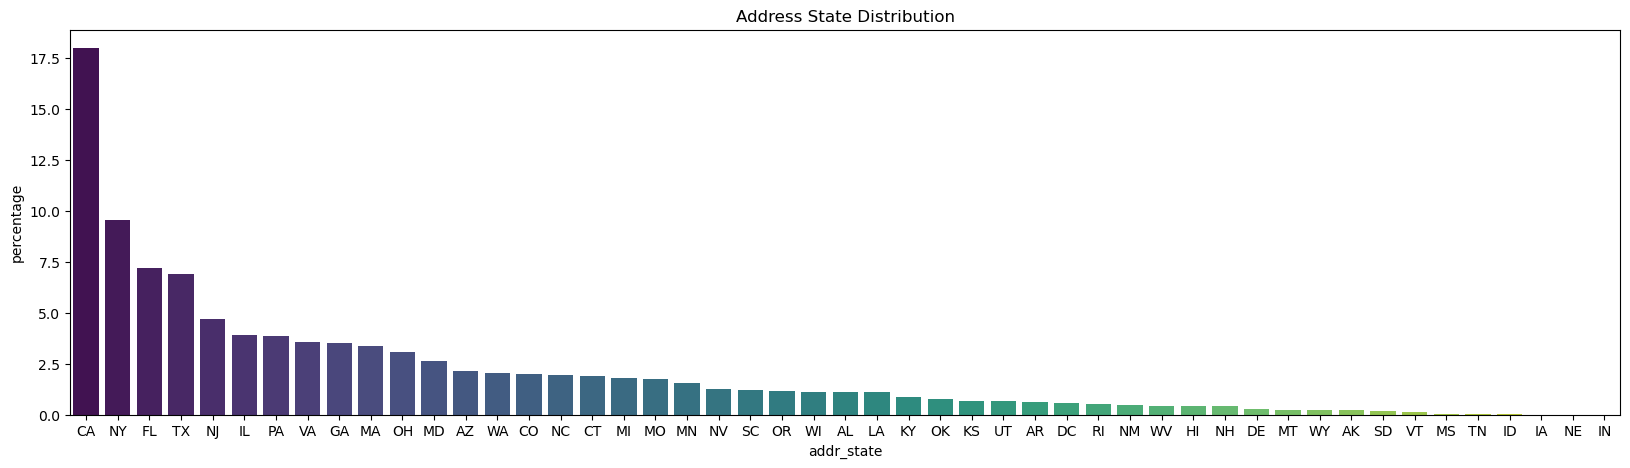

In [209]:
# State value count
plt.figure(figsize=(20,5))
prob_df=df['addr_state'].value_counts(normalize=True).reset_index()

# Convert the probability to percentage by multiplying by 100
prob_df['percentage'] = prob_df['proportion'] * 100
sns.barplot(x='addr_state',y='percentage',data=prob_df, palette='viridis',legend=False,hue='addr_state')
plt.title('Address State Distribution')
plt.show()


**Analysis**:

Most of the lending individuals are from California and New York.

Grade

Column Name: loan_status

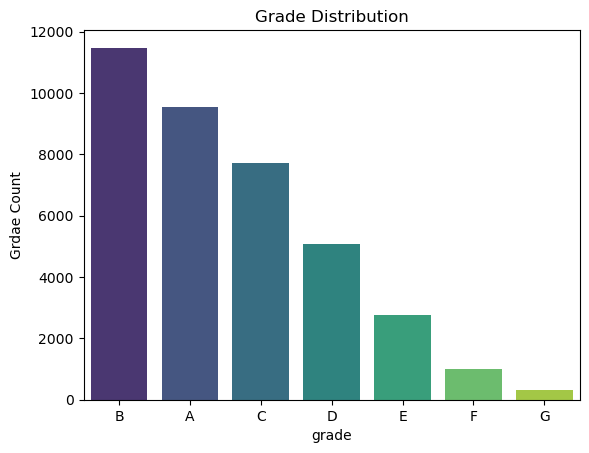

In [210]:
# Grade Count
grade_count=df['grade'].value_counts()
# Create a bar plot
sns.barplot(x=grade_count.index,y=grade_count.values,palette='viridis',hue=grade_count.index,legend=False)
plt.ylabel('Grdae Count')
plt.title('Grade Distribution')
plt.show()

**Analysis**
LendingClub mostly allocates loans to borrowers with a grade of B.

Loan Status

Column Name: loan_status

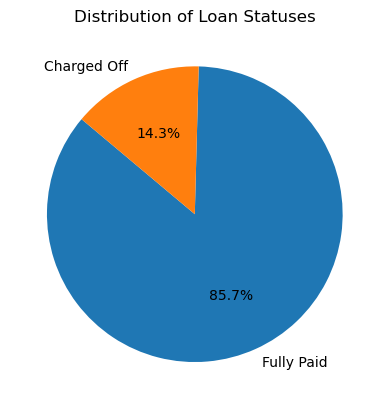

In [211]:
df_filtered = df[df['loan_status'] != 'Current']
loan_status=df_filtered['loan_status'].value_counts(normalize=True).reset_index()
loan_status['percentage'] = loan_status['proportion'] * 100
# Plotting the pie chart
plt.pie(loan_status['percentage'], labels=loan_status['loan_status'], autopct='%1.1f%%', startangle=140)

# Title for the pie chart
plt.title('Distribution of Loan Statuses')

# Display the pie chart
plt.show()

**Analysis**

80% of borrowers have fully paid off their loans.

Sub Grade

Column Name: sub_grade

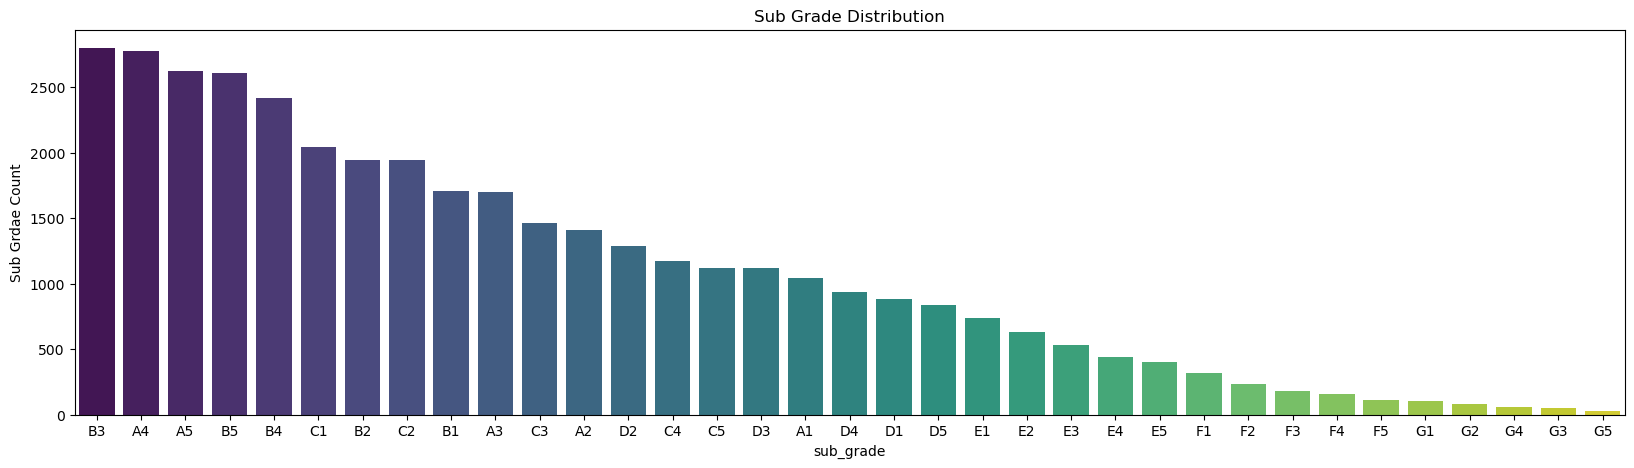

In [212]:
# Grade Count
sub_grade=df['sub_grade'].value_counts()
# Create a bar plot
plt.figure(figsize=(20,5))
sns.barplot(x=sub_grade.index,y=sub_grade.values,palette='viridis',hue=sub_grade.index,legend=False)
plt.ylabel('Sub Grdae Count')
plt.title('Sub Grade Distribution')
plt.show()

**Analysis**

LendingClub mostly allocates loans to borrowers with a sub grade of B3 and A4.

Employment Length

Column Name: emp_length

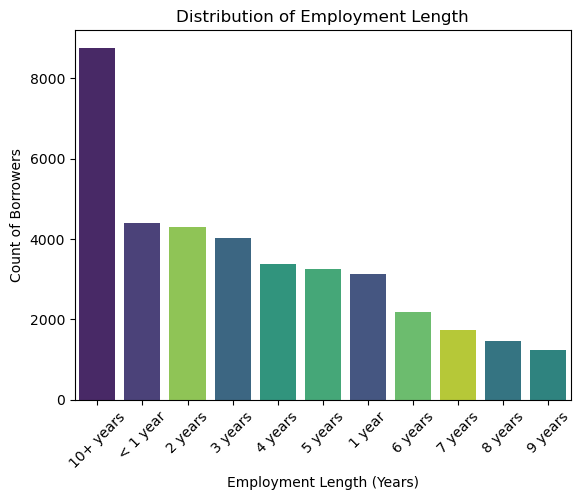

In [213]:
# Plotting the value counts of 'emp_length'
sns.countplot(x='emp_length', data=df, order=df['emp_length'].value_counts().index, hue='emp_length', palette='viridis')

# Adding labels and title
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count of Borrowers')
plt.xticks(rotation=45)
plt.show()

**Analysis**

Borrowers with employment lengths exceeding 10 years tend to borrow more loans.

Funded Amount

Description: The total amount committed to that loan at that point in time.

Column Name: funded_amnt

In [214]:
df['funded_amnt'].describe()

count    37898.000000
mean     11046.757085
std       7206.575568
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

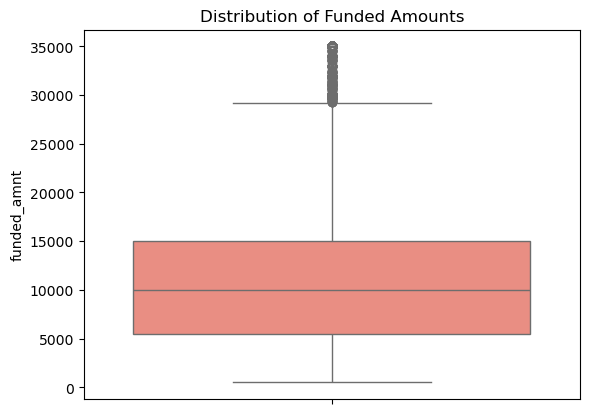

In [215]:
# Box plot

sns.boxplot(df['funded_amnt'],color='salmon')   
plt.title('Distribution of Funded Amounts')
plt.show()

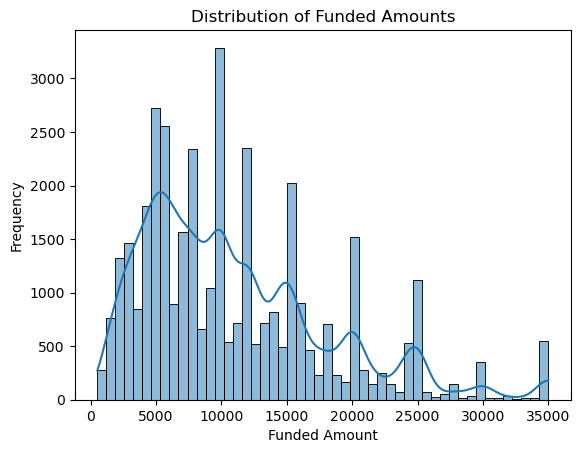

In [216]:
# Histogram plot
sns.histplot(df["funded_amnt"], bins=50, kde=True,legend=False)
plt.title("Distribution of Funded Amounts")
plt.xlabel("Funded Amount")
plt.ylabel("Frequency")
plt.show()

**Analysis**

From the summary, most borrowers tend to take loan amounts around $10,000, as indicated by the median and the interquartile range between $5,500 and $15,000. Very few borrowers have loan amounts exceeding $30,000, with the maximum loan amount reaching $35,000.

Installment

Description: The monthly payment owed by the borrower if the loan originates.

Column Name: installment

In [217]:
df['installment'].describe()

count    37898.000000
mean       327.050851
std        209.137100
min         16.080000
25%        168.670000
50%        283.050000
75%        434.750000
max       1305.190000
Name: installment, dtype: float64

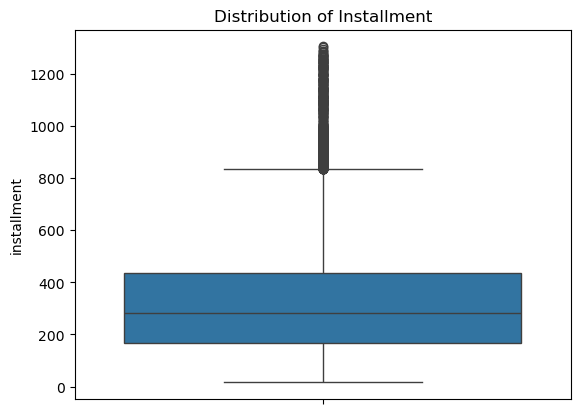

In [218]:
#Box plot
sns.boxplot(df['installment'],legend=False)
plt.title('Distribution of Installment')
plt.show()

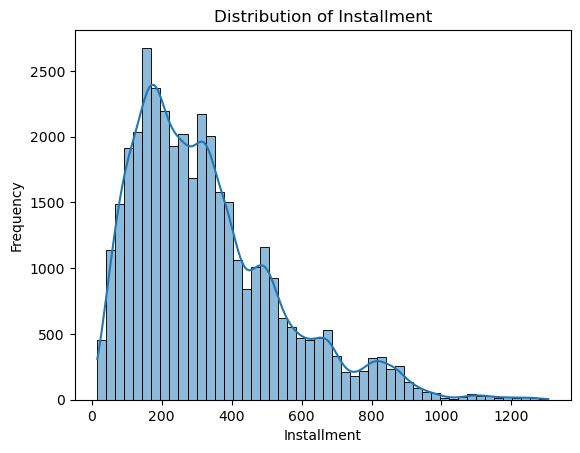

In [219]:
# Histogram plot
sns.histplot(df['installment'], bins=50, kde=True)
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

**Analysis**

The installment column shows that the average monthly payment is $327.05, with most borrowers paying between $168.67 and $434.75. While the minimum payment is as low as $16.08, some borrowers have high payments up to $1,305.19, indicating significant variability in monthly installments.

Interest Rate

Description: Interest Rate on the loan

Column Name: int_rate

In [220]:
df['int_rate'].describe()

count    37898.000000
mean        12.074011
std          3.734343
min          5.420000
25%          9.320000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64

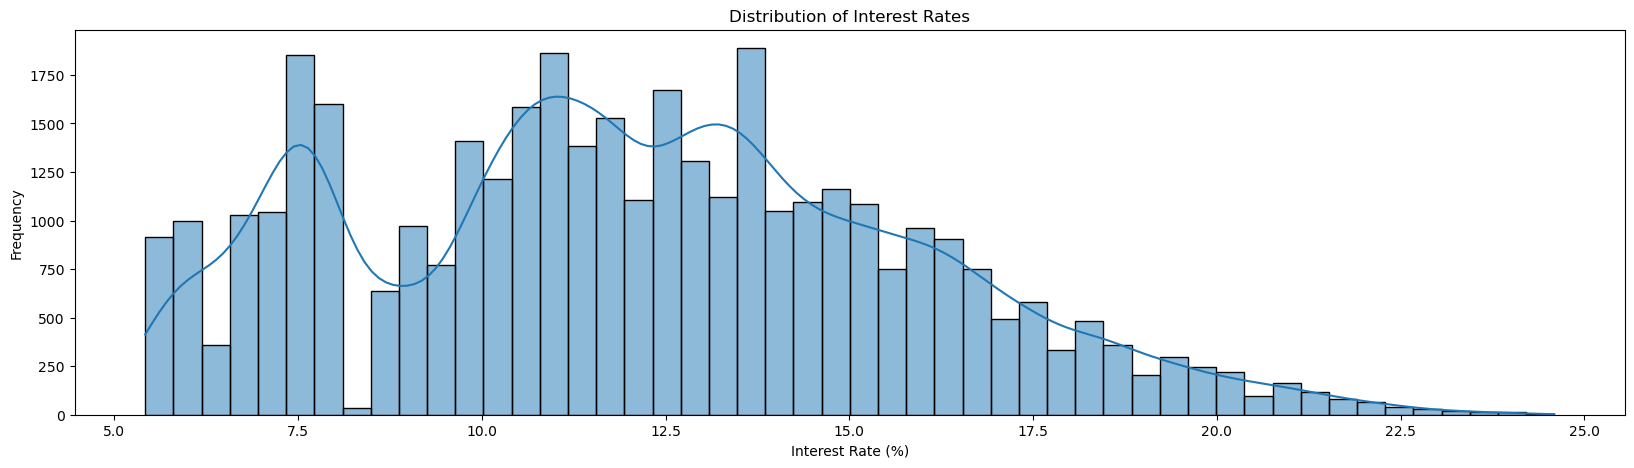

In [221]:
# Plotting the distribution of interest rates
plt.figure(figsize=(20,5))
sns.histplot(df['int_rate'], bins=50, kde=True)

# Adding title and labels
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

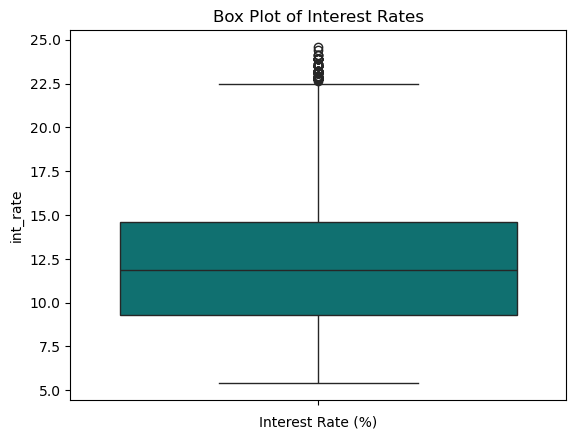

In [222]:
# Plotting the box plot for 'int_rate'
sns.boxplot(df['int_rate'],color='teal')
# Adding title and labels
plt.title('Box Plot of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.show()

**Analysis**

The average interest rate is 12.07%, with most loans having rates between 5.42% and 14.61%. The lowest rate is 5.42%, and the highest is 24.59%.

Debt-to-Income Ratio.

Description: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Column Name: dti

In [223]:
df['dti'].describe()

count    37898.000000
mean        13.374795
std          6.656638
min          0.000000
25%          8.270000
50%         13.470000
75%         18.630000
max         29.990000
Name: dti, dtype: float64

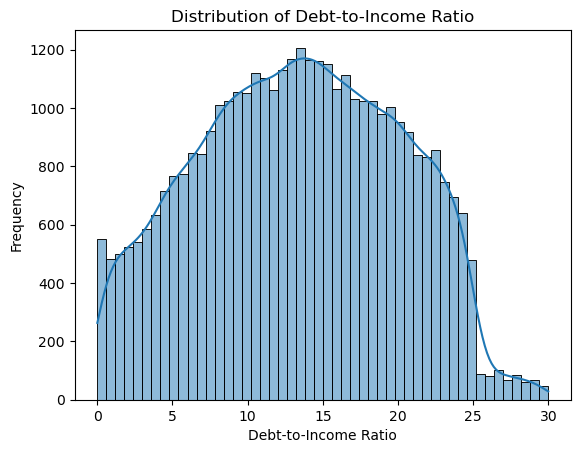

In [224]:
# Plotting the distribution for 'dti'
sns.histplot(df['dti'], bins=50, kde=True)
# Adding title and labels
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

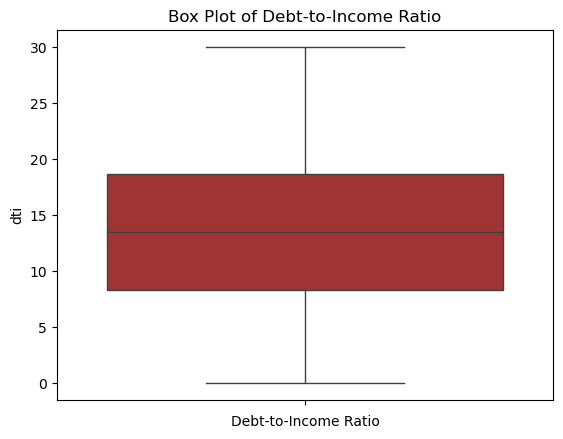

In [225]:
# Plotting the box plot for 'dti'
sns.boxplot(df['dti'],color='firebrick')
# Adding title and labels
plt.title('Box Plot of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.show()

**Analysis**

The average DTI (Debt-to-Income Ratio) is 13.37%, with most borrowers having a DTI between 0% and 18.63%. The lowest DTI is 0%, and the highest is 29.99%

Public Record

Description: Number of derogatory public records

Column Name: pub_rec

In [226]:
df['pub_rec'].describe()

count    37898.000000
mean         0.053802
std          0.234912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

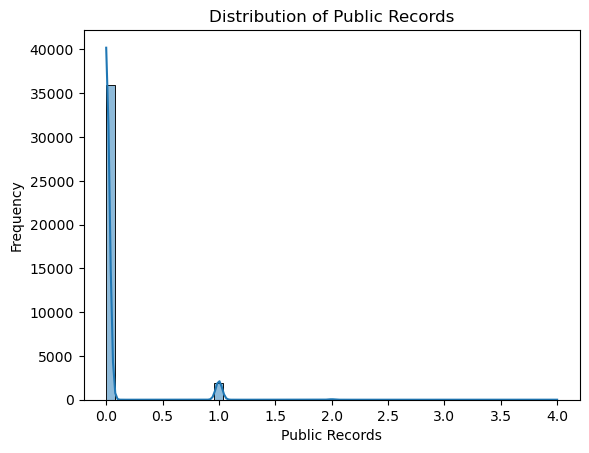

In [227]:
# Plotting the distribution for 'pub_rec'
sns.histplot(df['pub_rec'], bins=50, kde=True)
# Adding title and labels
plt.title('Distribution of Public Records')
plt.xlabel('Public Records')
plt.ylabel('Frequency')
plt.show()

**Analysis**

The majority of borrowers have zero public records, indicating that most borrowers do not have any public financial issues or legal records.

Credit utilization rate

Description: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Column Name: revol_util

In [228]:
df['revol_util'].describe()

count    37898.000000
mean        49.128721
std         28.277582
min          0.000000
25%         25.800000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

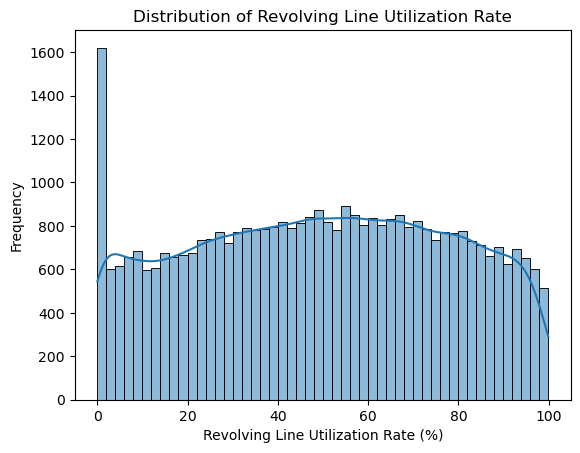

In [229]:
# Plotting the distribution for 'revol_util'
sns.histplot(df['revol_util'], bins=50, kde=True)
# Adding title and labels
plt.title('Distribution of Revolving Line Utilization Rate')
plt.xlabel('Revolving Line Utilization Rate (%)')
plt.ylabel('Frequency')
plt.show()

**Analysis**

The average Revolving Line Utilization Rate is 49.13%, with most borrowers using between 0% and 72.60% of their available credit. Some borrowers are using nearly all of their credit, with a maximum rate of 99.90%.

Annual Income

Description: The self-reported annual income provided by the borrower during registration.

Column Name: annual_inc

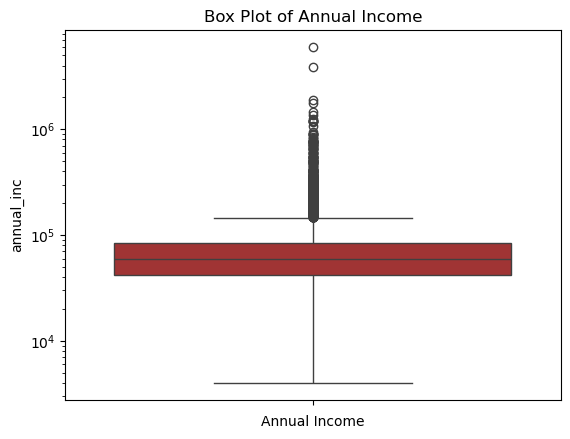

In [230]:
# Plotting the box plot for 'dti'
sns.boxplot(df['annual_inc'],color='firebrick')
# Adding title and labels
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.yscale('log')
plt.show()

Funded Amount

Description: The total amount committed to that loan at that point in time.

Column Name: funded_amnt

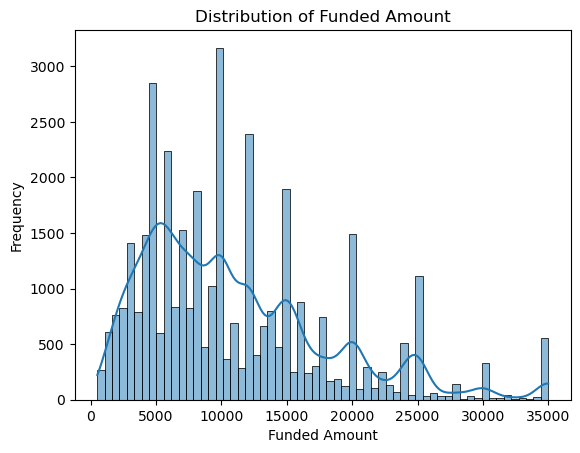

In [231]:
# Plotting the distribution for 'funded_amnt'
sns.histplot(df["funded_amnt"], kde=True)
# Adding title and labels
plt.title("Distribution of Funded Amount")
plt.xlabel("Funded Amount")
plt.ylabel("Frequency")
plt.show()

Number of  inquiries in past 6 months

Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

Column Name: inq_last_6mths

[1 5 2 0 3 4 6 7 8]
count    37898.00
mean         0.87
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          8.00
Name: inq_last_6mths, dtype: float64


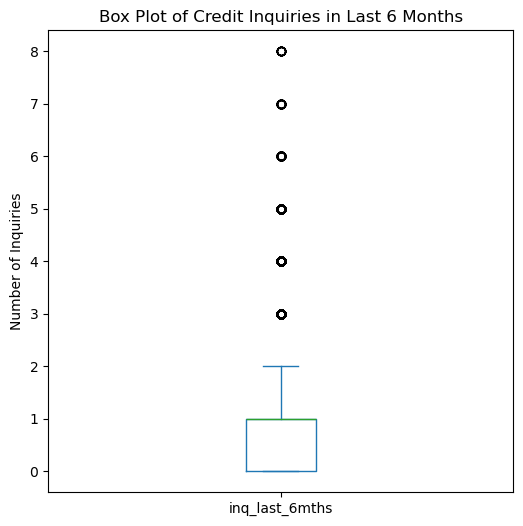

In [232]:
print(df["inq_last_6mths"].unique())
print(df["inq_last_6mths"].describe().round(2))
df["inq_last_6mths"].plot(kind="box", figsize=(6, 6))
plt.title("Box Plot of Credit Inquiries in Last 6 Months")
plt.ylabel("Number of Inquiries")
plt.show()

Recoveries

Description: post charge off gross recovery

Column Name: recoveries

0           0.00
1         117.08
2           0.00
3           0.00
4           0.00
          ...   
39562       0.00
39573       0.00
39623    1909.87
39666     304.20
39680       0.00
Name: recoveries, Length: 37898, dtype: float64


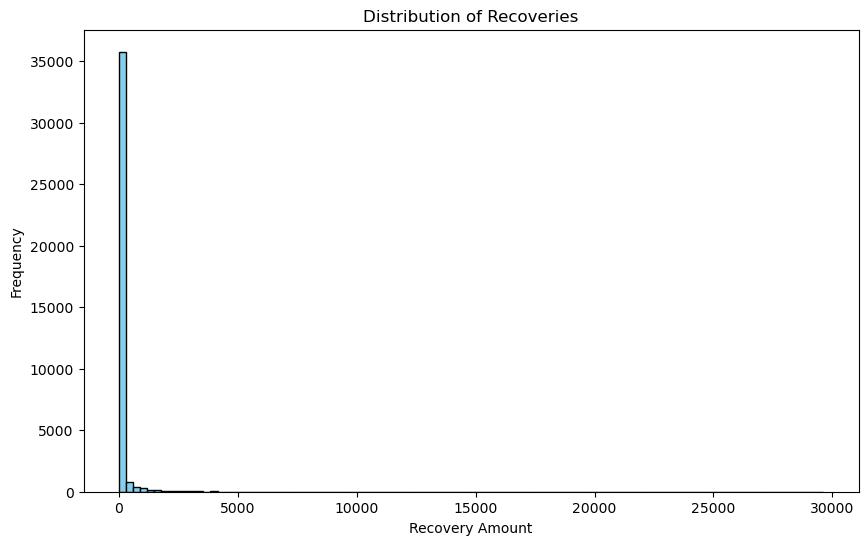

Proportion of loans with zero recoveries: 89.50%


In [233]:
print(df["recoveries"])
df["recoveries"].plot(kind="hist", bins=100, figsize=(10, 6), color="skyblue", edgecolor="black")
plt.title("Distribution of Recoveries")
plt.xlabel("Recovery Amount")
plt.ylabel("Frequency")
plt.show()
zero_recoveries = (df["recoveries"] == 0).sum()
total_loans = len(df["recoveries"])
proportion_zero = zero_recoveries / total_loans * 100
print(f"Proportion of loans with zero recoveries: {proportion_zero:.2f}%")

## Segmented Univariate Analysis

Loan Status by Loan Amount

In [234]:
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39562     4800
39573     7000
39623     9000
39666    15450
39680     3000
Name: loan_amnt, Length: 37898, dtype: int64

Descriptive Statistics:
               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5266.0  12256.010254  8102.870621  1000.0  6000.0  10000.0   
Fully Paid   31534.0  10964.766601  7223.862728   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16987.5  35000.0  
Fully Paid   15000.0  35000.0  


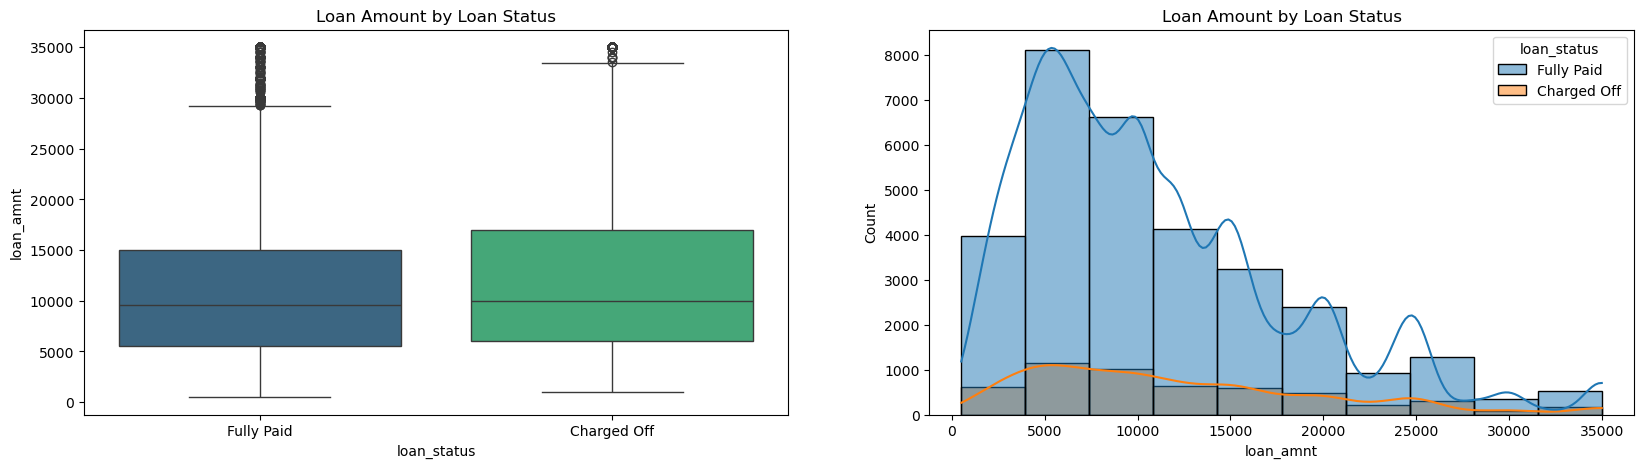

In [235]:
# 1. Descriptive Statistics
df_filtered = df[df['loan_status'] != 'Current']
print("Descriptive Statistics:")
print(df_filtered.groupby('loan_status')['loan_amnt'].describe())

# 2. Boxplot for Loan Amount by Loan Status
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='loan_status', y='loan_amnt',hue='loan_status', data=df_filtered, palette='viridis',legend=False)
plt.title('Loan Amount by Loan Status')
plt.subplot(122)

# 3. Histogram for Loan Amount by Loan Status

sns.histplot(data=df_filtered, x='loan_amnt', hue='loan_status', kde=True, bins=10)
plt.title('Loan Amount by Loan Status')
plt.show()

**Analysis**

Charged Off loans have a higher average loan amount ($12,256) compared to Fully Paid loans ($10,965).

Annual Income by. Loan Term

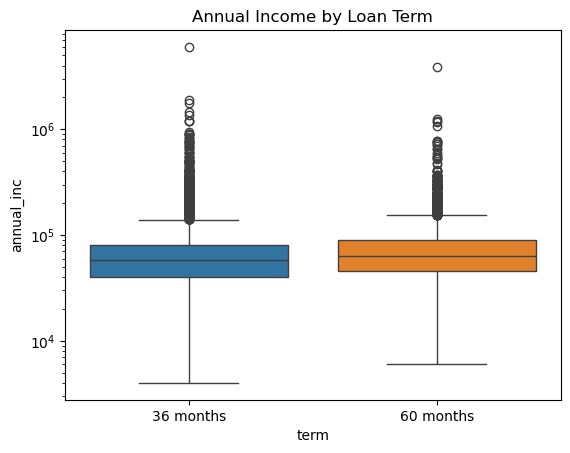

In [236]:
# 2. Boxplot for Loan Amount by Loan Status
sns.boxplot(x='term', y='annual_inc',hue='term', data=df)
plt.title('Annual Income by Loan Term')
plt.yscale('log')


**Analysis**

No much differences in the annual income by term

Loan Amount by. Home Ownership

Text(0.5, 1.0, 'Home ownership by Loan Amount')

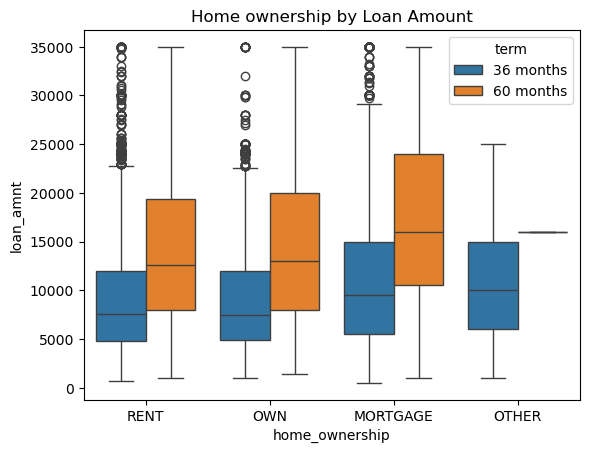

In [237]:
sns.boxplot(x='home_ownership', y='loan_amnt',hue='term', data=df)
plt.title('Home ownership by Loan Amount')

**Analysis**

Higer the loan amount in the mortgage homeownership

Loan Status by Annual Income

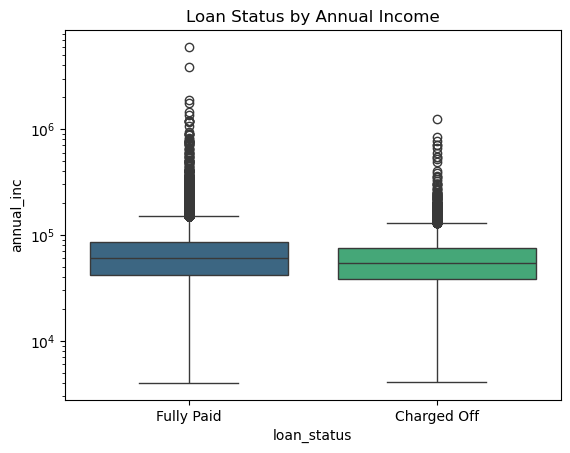

In [238]:
df_filtered = df[df['loan_status'] != 'Current']
sns.boxplot(x='loan_status',y='annual_inc',hue='loan_status',data=df_filtered,palette='viridis',legend=False)
plt.title('Loan Status by Annual Income')
plt.yscale('log')

**Analysis**

People with higher annual income have fully paid theri loan

Loan Status by. Loan Purpose

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39562     Fully Paid
39573     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status, Length: 37898, dtype: object


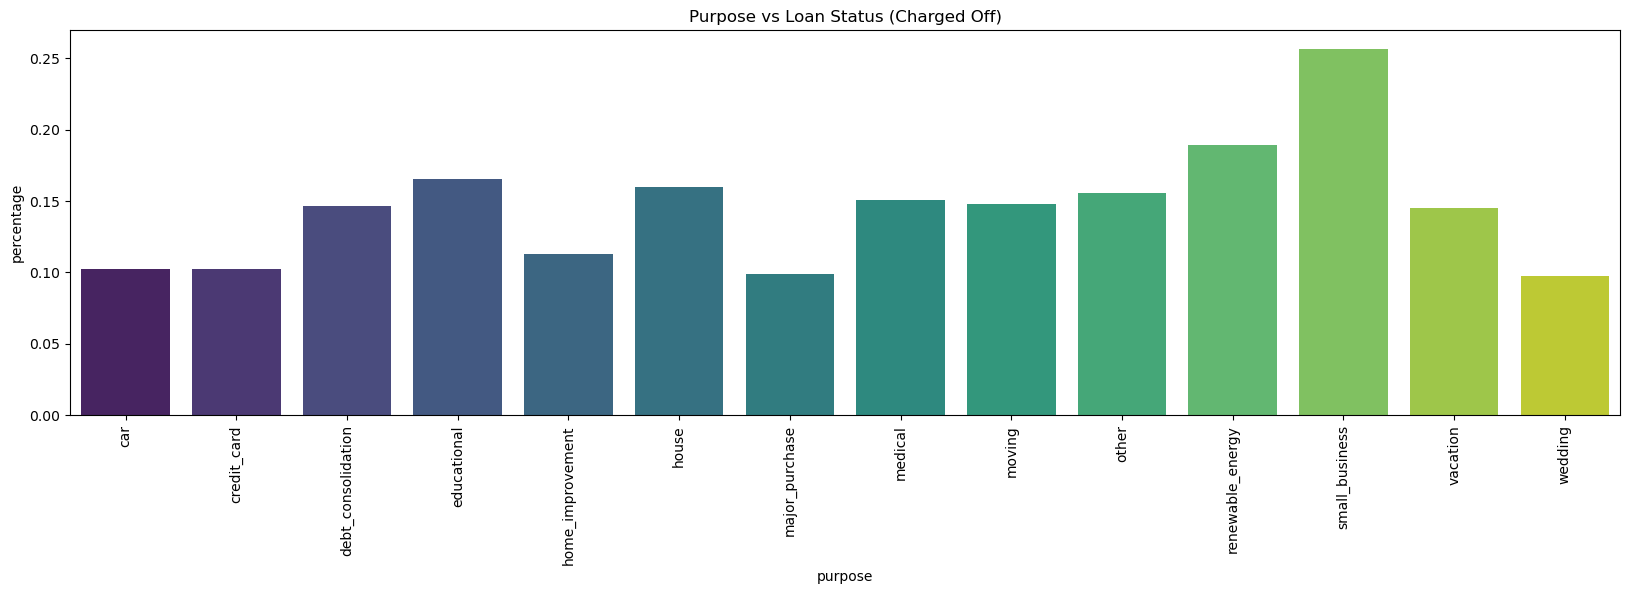

In [239]:
# Group by 'purpose' and 'loan_status' to count the occurrences
data = df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()

# Calculate percentage for each purpose across all loan statuses
data['percentage'] = data.groupby('purpose')['id'].transform(lambda x: x / x.sum())
# Filter for 'Charged Off' loan status
charged_off_data = data[data['loan_status'] == 'Charged Off']
print(df['loan_status'])
# Plot the barplot
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='percentage', data=charged_off_data, palette='viridis',legend=False,hue='purpose')
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Status (Charged Off)')
plt.show()

**Analysis**

Peopel who bought loan for the small business have defaulted more

Term vs. Interest Rate

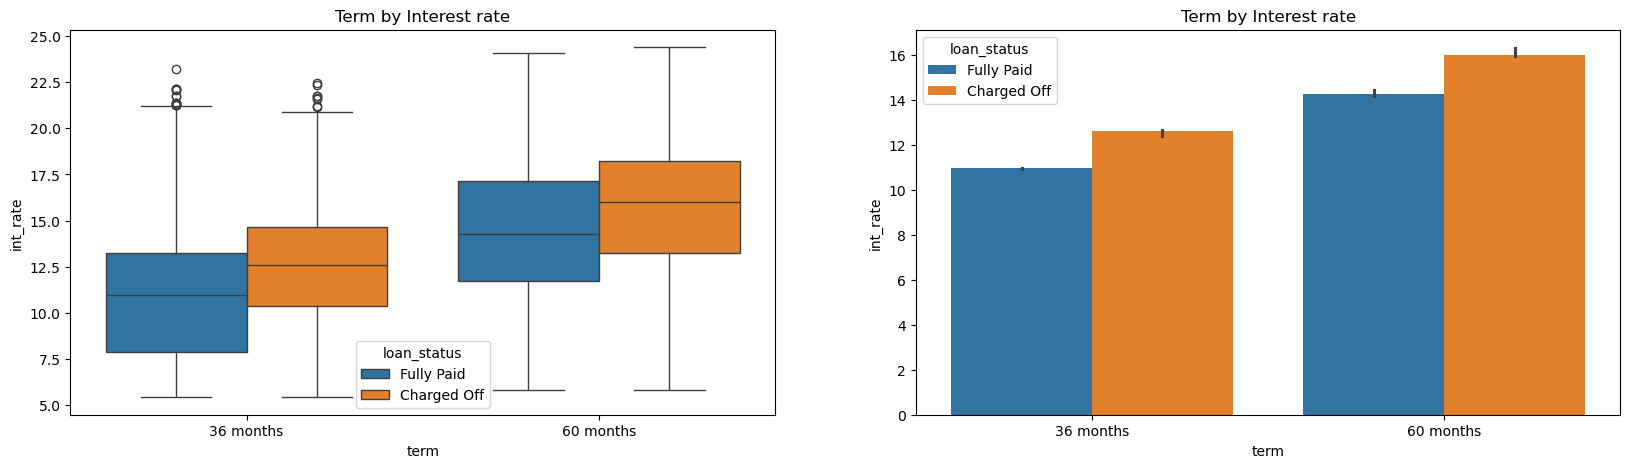

In [240]:
df_filtered = df[df['loan_status'] != 'Current']
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=df_filtered)
plt.title('Term by Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=df_filtered, estimator=np.median)
plt.title('Term by Interest rate')
plt.show()

**Analysis**

In both 36-month and 60-month loan terms, higher interest rates lead to higher default rates.

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

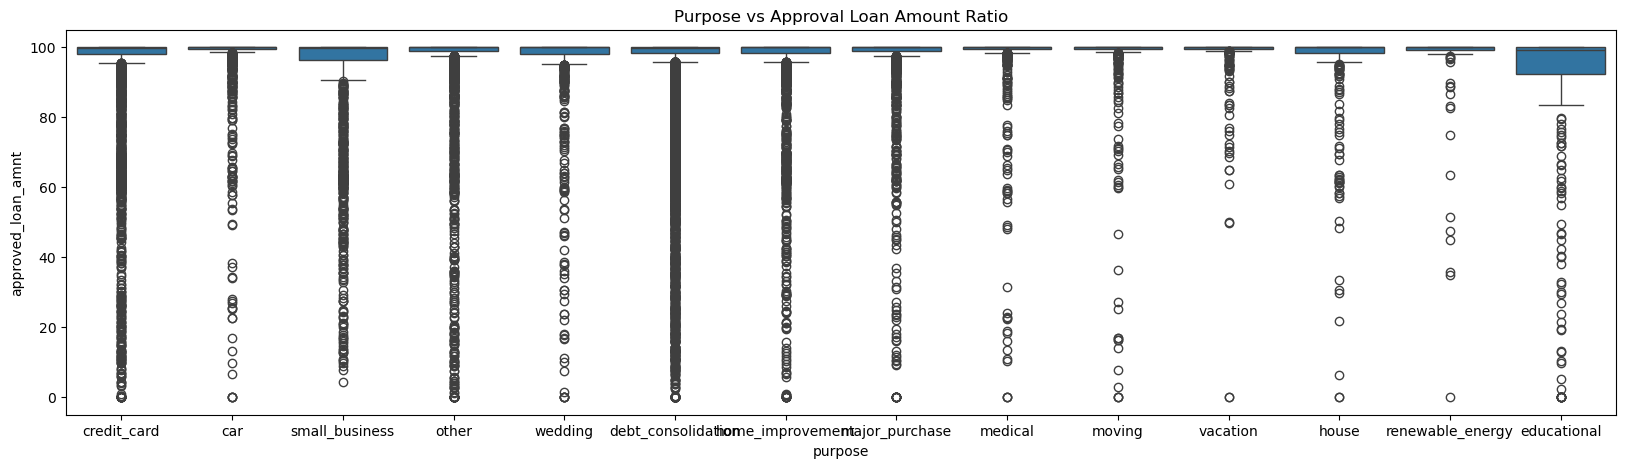

In [241]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=df.approved_loan_amnt, data=df)
plt.title('Purpose vs Approval Loan Amount Ratio')

## Bivariate Analysis

Loan Status by Loan Amount

               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5266.0  12256.010254  8102.870621  1000.0  6000.0  10000.0   
Fully Paid   31534.0  10964.766601  7223.862728   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16987.5  35000.0  
Fully Paid   15000.0  35000.0  


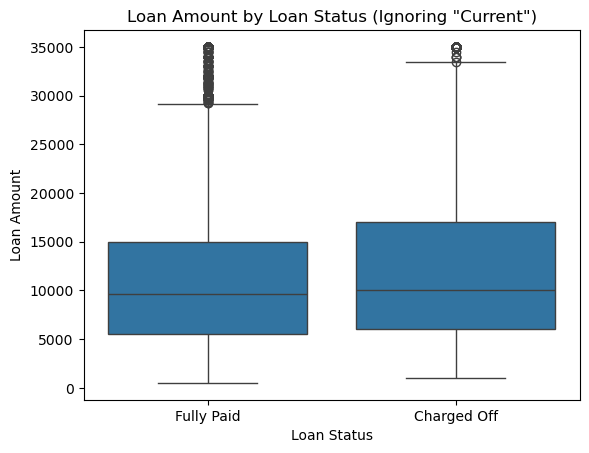

In [242]:

# Filter out the 'Current' loan status
df_filtered = df[df['loan_status'] != 'Current']
loan_status_summary = df_filtered.groupby('loan_status')['loan_amnt'].describe()
print(loan_status_summary)
sns.boxplot(x='loan_status', y='loan_amnt', data=df_filtered)
plt.title('Loan Amount by Loan Status (Ignoring "Current")')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

**Analysis**

The analysis suggests that loan size is somewhat correlated with loan performance: larger loans are more likely to be charged off, while smaller loans are more likely to be fully paid.

Loan Status by Interset Rate

               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5266.0  13.925055  3.651801  5.42  11.49  13.79  16.45  24.40
Fully Paid   31534.0  11.659557  3.609064  5.42   8.59  11.49  13.99  24.11


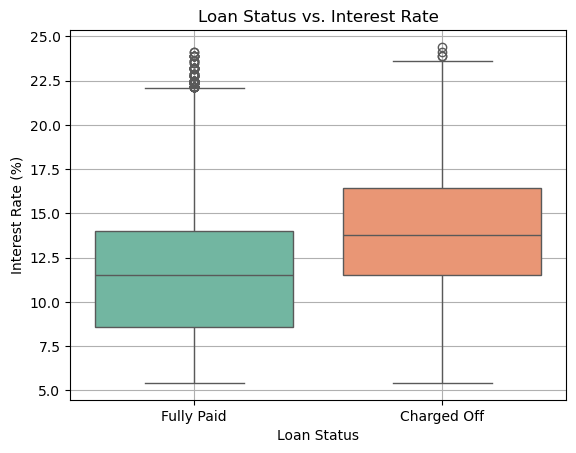

In [243]:
# Group by Loan Status and calculate the summary statistics for Interest Rate
df_filtered = df[df['loan_status'] != 'Current']
loan_status_int_rate_summary = df_filtered.groupby('loan_status')['int_rate'].describe()

# Display the summary statistics
print(loan_status_int_rate_summary)


# Boxplot to show the distribution of interest rates across different loan statuses
sns.boxplot(x='loan_status', y='int_rate', data=df_filtered, palette='Set2',hue='loan_status',legend=False)

plt.title('Loan Status vs. Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

**Analysis**

Charged off loans have a higher average interest rate (13.93%) than fully paid loans (11.66%), with slightly more variation in rates. The median interest rate for charged off loans (13.79%) is also higher, indicating that loans with higher interest rates tend to default more

Loan Status vs Installment

               count        mean         std    min      25%     50%  \
loan_status                                                            
Charged Off   5266.0  338.773802  216.153102  22.79  171.535  296.75   
Fully Paid   31534.0  322.590782  207.567945  16.08  167.080  278.15   

                  75%      max  
loan_status                     
Charged Off  460.1000  1305.19  
Fully Paid   424.5525  1295.21  


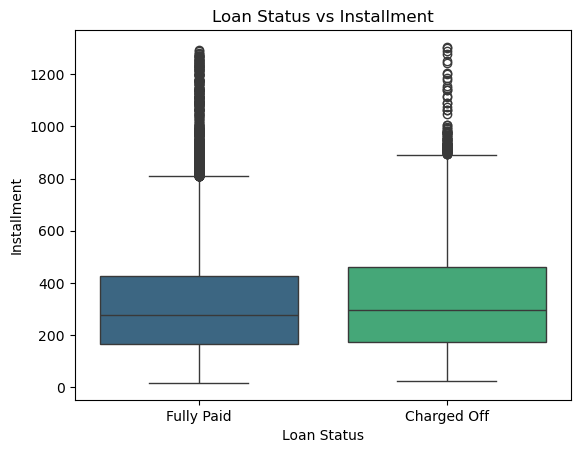

In [244]:
df_filtered=df[df['loan_status']!='Current']
loan_status_summary=df_filtered.groupby('loan_status')['installment'].describe()
print(loan_status_summary)
    

# Boxplot to show the distribution of installment across different loan statuses
sns.boxplot(x='loan_status',y='installment',data=df_filtered,palette='viridis',hue='loan_status',legend=False)
plt.title('Loan Status vs Installment')
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()


**Analysis**

Loan Status vs. Installment, charged off loans have slightly higher average installments ($338.77) compared to fully paid loans ($322.59). Charged off loans also show more variation in installment amounts (higher standard deviation). The median installment is higher for charged off loans ($296.75 vs. $278.15), suggesting that larger loans may have a higher risk of default.

Grade vs Loan Amount

         count          mean          std     min      25%      50%      75%  \
grade                                                                          
A       9553.0   8729.064168  5366.359752   725.0   5000.0   7625.0  11500.0   
B      11476.0  11203.953904  7217.254267   500.0   5500.0  10000.0  15000.0   
C       7731.0  11111.521795  7336.561564  1000.0   5100.0  10000.0  15000.0   
D       5068.0  12363.891081  7662.456284  1000.0   6000.0  10400.0  16000.0   
E       2749.0  15893.061113  8994.243636  1000.0   8500.0  15000.0  22000.0   
F       1010.0  18461.212871  9142.930807  1200.0  11125.0  18100.0  25000.0   
G        311.0  20273.472669  8514.050749  1600.0  14100.0  20500.0  25000.0   

           max  
grade           
A      35000.0  
B      35000.0  
C      35000.0  
D      35000.0  
E      35000.0  
F      35000.0  
G      35000.0  


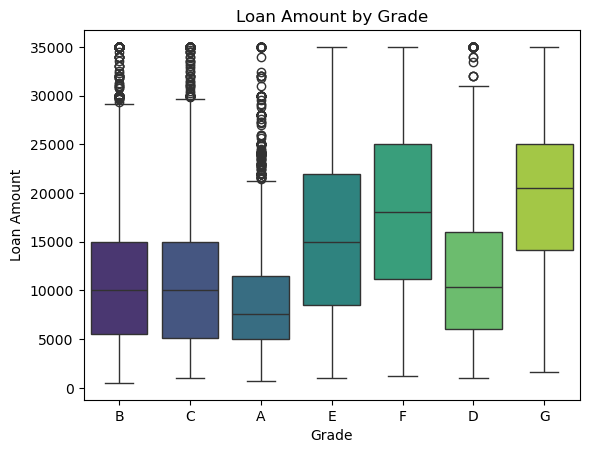

In [245]:
loan_amt_summary = df.groupby('grade')['loan_amnt'].describe()
print(loan_amt_summary)

# Boxplot for loan amount by grade
sns.boxplot(x='grade', y='loan_amnt', data=df, palette='viridis',hue='grade',legend=False)
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

**Analysis**

Loan amounts increase as the grade decreases, with Grade G having the highest average at $20,273. Lower grades (E, F, G) have more variation in loan amounts. Higher grades (A, B, C) have lower and more consistent loan amounts.

Purpose by Loan Amount

                      count          mean          std     min      25%  \
purpose                                                                   
car                  1478.0   6846.312585  4155.886747  1000.0  4000.00   
credit_card          4900.0  11827.204082  6994.137547   725.0  6500.00   
debt_consolidation  17940.0  12791.835284  7493.073826  1000.0  7000.00   
educational           296.0   6825.422297  5152.705171  1000.0  3000.00   
home_improvement     2828.0  11635.864569  8134.659517  1000.0  5000.00   
house                 363.0  13179.752066  8315.951635  1200.0  6500.00   
major_purchase       2090.0   8176.040670  6128.091227  1000.0  4000.00   
medical               657.0   8259.398782  6138.456639  1000.0  4000.00   
moving                548.0   6740.693431  5868.557775  1000.0  3000.00   
other                3715.0   8178.358008  6502.268617   500.0  3600.00   
renewable_energy       95.0   8927.894737  7131.805133  1000.0  3550.00   
small_business       1729

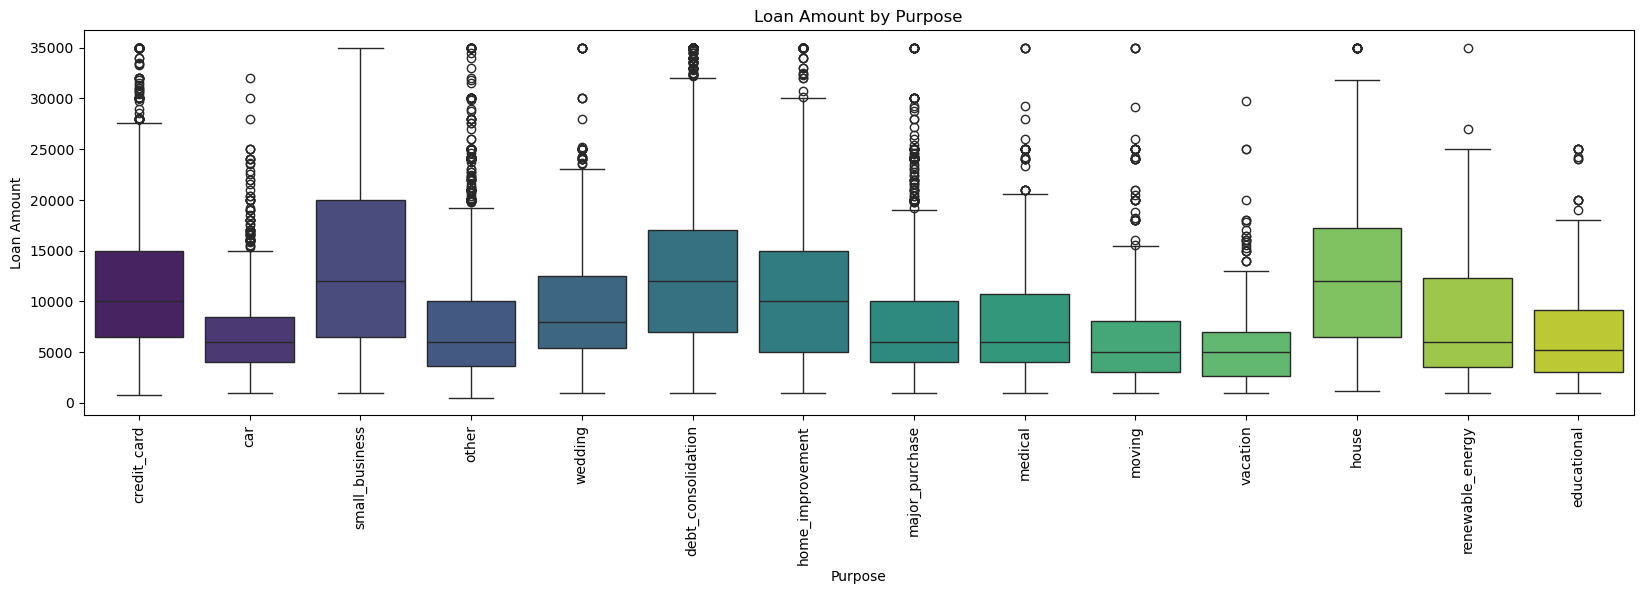

In [246]:
loan_amt_summary = df.groupby('purpose')['loan_amnt'].describe()
print(loan_amt_summary)
# Boxplot for loan amount by purpose
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y='loan_amnt', data=df, palette='viridis',hue='purpose',legend=False)
plt.title('Loan Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90) 
plt.show()

**Analysis**

Loan amounts are generally higher for purposes like debt consolidation, small business, and house purchases, while purposes like car, moving, and vacation loans tend to have lower average amounts.

Loan Amount by Funded Amount

Correlation between Loan Amount and Funded Amount: 0.9813630051181129


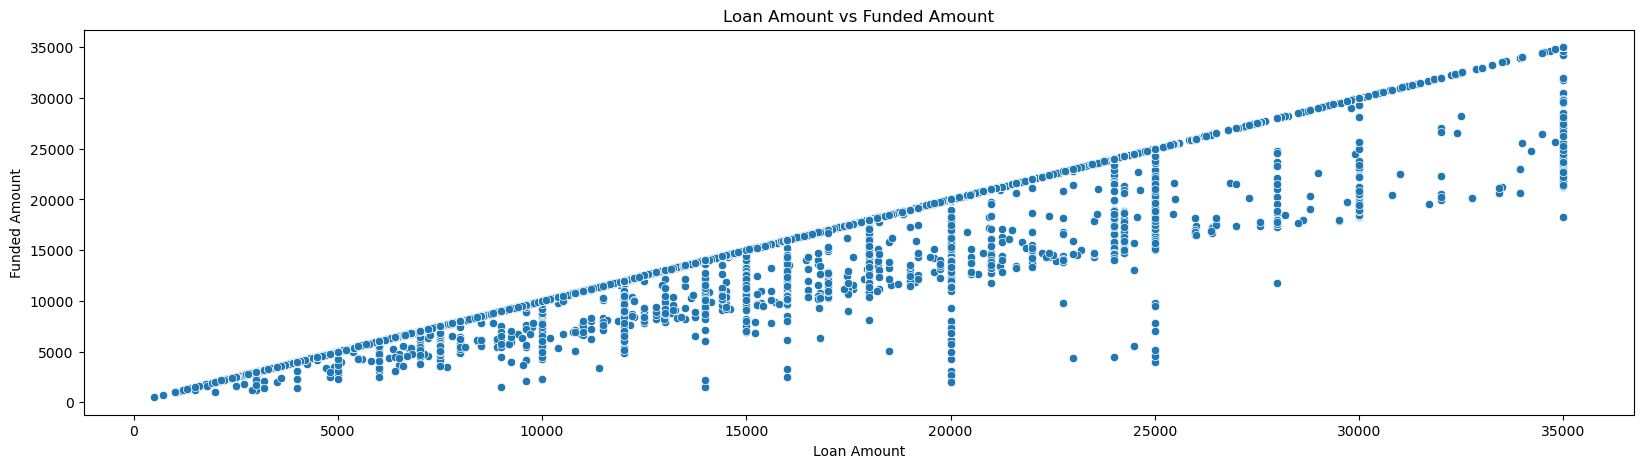

In [247]:
# Correlation between Loan Amount and Funded Amount
correlation = df['loan_amnt'].corr(df['funded_amnt'])
print(f"Correlation between Loan Amount and Funded Amount: {correlation}")
# Scatter plot for loan amount vs funded amount
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='loan_amnt', y='funded_amnt')
plt.title('Loan Amount vs Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')
plt.show()

**Analysis**

The correlation between Loan Amount and Funded Amount is 0.98, showing a very strong relationship. This means that the funded amount is almost always close to the loan amount. When the loan amount goes up, the funded amount increases similarly.

Debit to Income Ratio vs Revolving Credit Utilization

Correlation between dti and revol_util: 0.2759821391379107


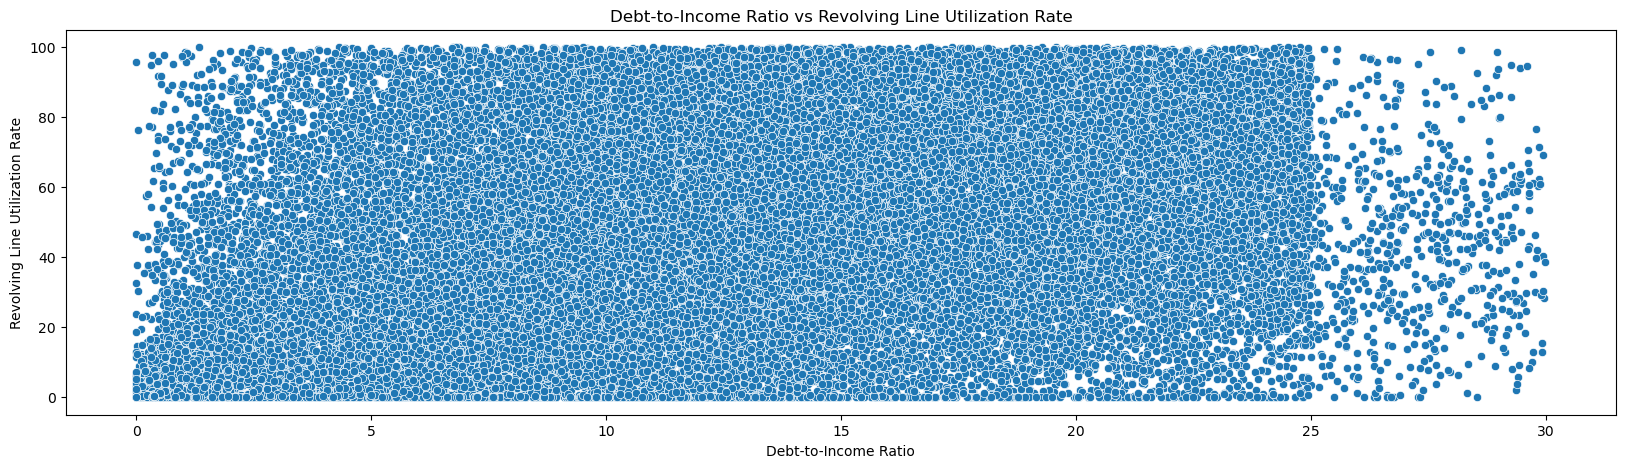

In [248]:
# Correlation between dti and revol_util
correlation = df['dti'].corr(df['revol_util'])
print(f"Correlation between dti and revol_util: {correlation}")
# Scatter plot for dti vs revol_util
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='dti', y='revol_util')
plt.title('Debt-to-Income Ratio vs Revolving Line Utilization Rate')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Revolving Line Utilization Rate')
plt.show()

**Analysis**

The correlation between DTI (Debt-to-Income Ratio) and Revolving Utilization (Revol_Util) is 0.28, indicating a weak positive correlation. This suggests that as the debt-to-income ratio increases, revolving utilization tends to increase slightly as well, but the relationship is not very strong

Loan Amount by Interest Rate

Correlation between Loan Amount and Interest Rate: 0.3081000590845289


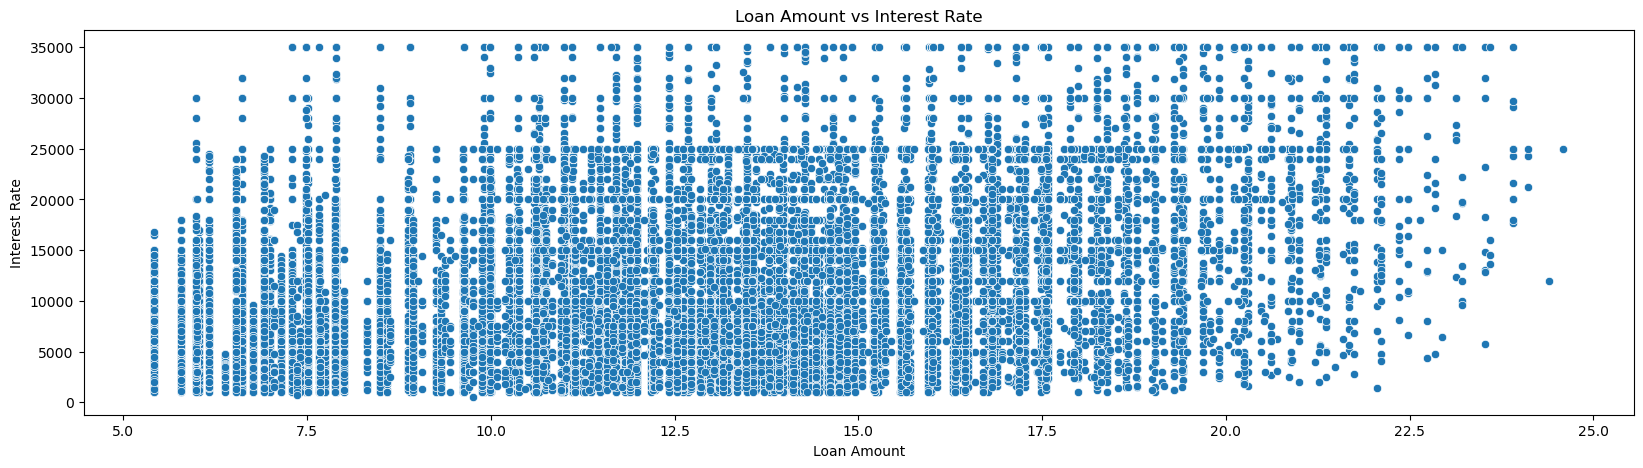

In [249]:
# Correlation between Loan Amount and Interest Rate
correlation=df['int_rate'].corr(df['loan_amnt'])
print(f"Correlation between Loan Amount and Interest Rate: {correlation}")
# Scatter plot for loan amount vs interest rate
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='int_rate', y='loan_amnt')
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

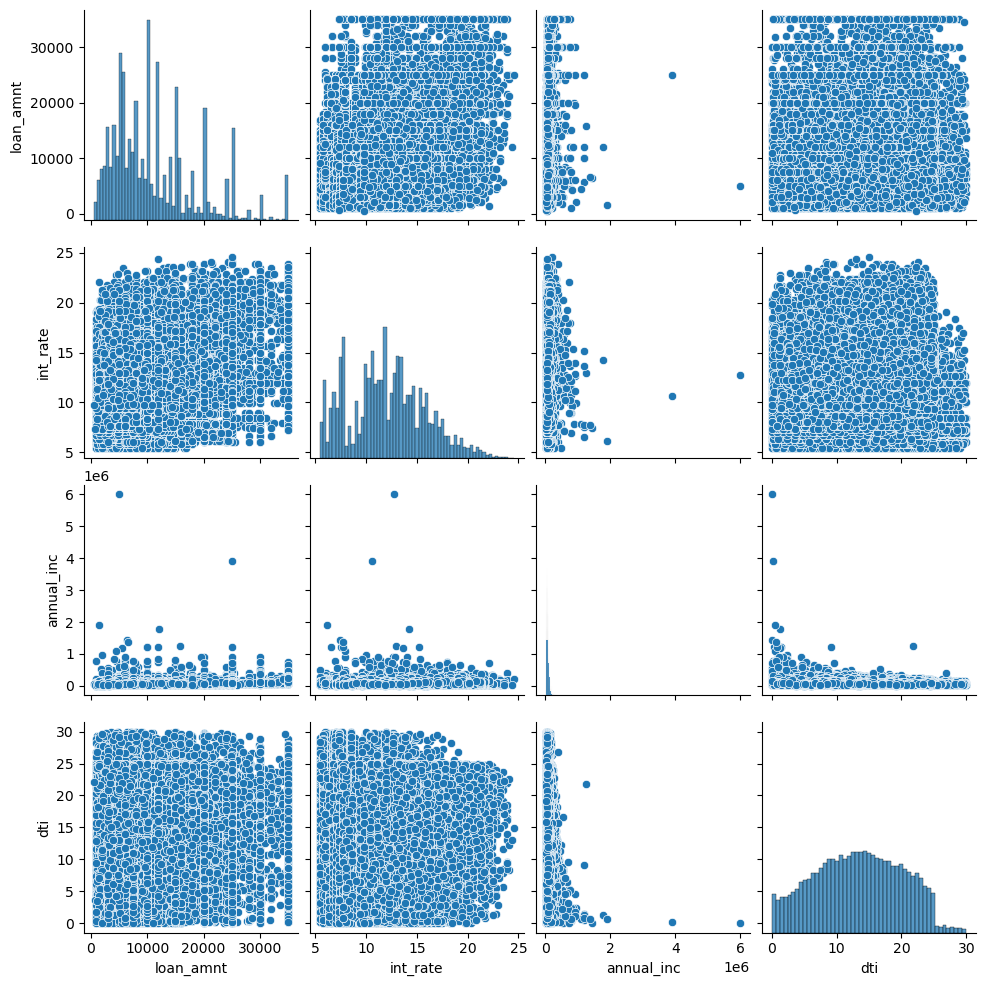

In [250]:
# Pairplot for loan amount, interest rate, annual income, and debt-to-income ratio
sns.pairplot(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']]) 
plt.show()

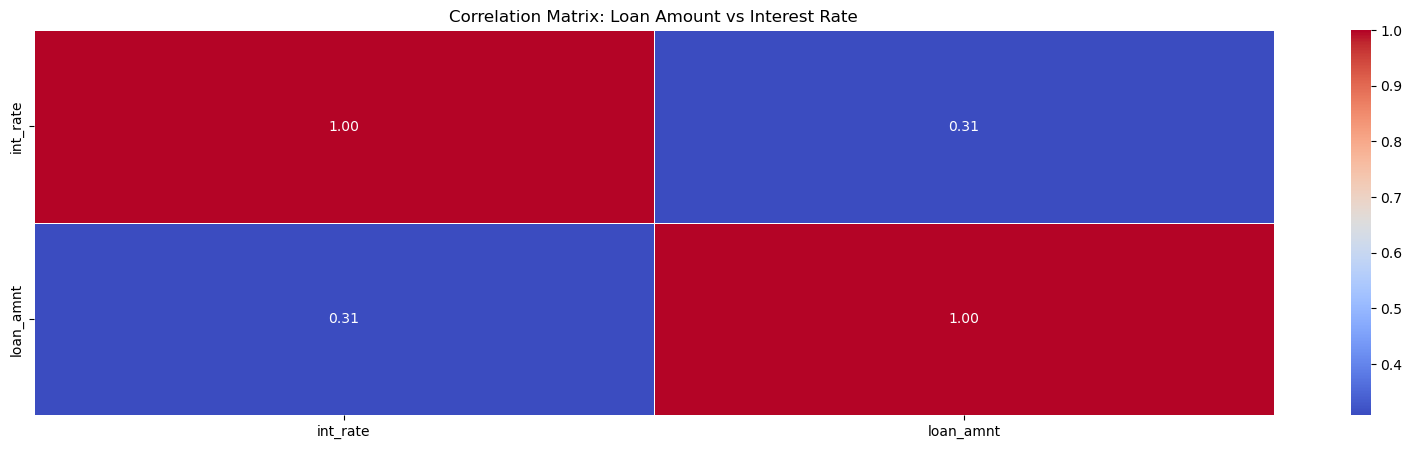

In [251]:
# Calculate the correlation between 'loan_amnt' and 'int_rate'
correlation_matrix = df[['int_rate', 'loan_amnt']].corr()

# Plot the heatmap
plt.figure(figsize=(20,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Loan Amount vs Interest Rate')
plt.show()

**Analysis**

The correlation between Loan Amount and Interest Rate is 0.31, indicating a weak positive relationship. This suggests that as the loan amount increases, the interest rate tends to increase slightly, but the relationship is not very strong.

Loan Term by Interest Rate

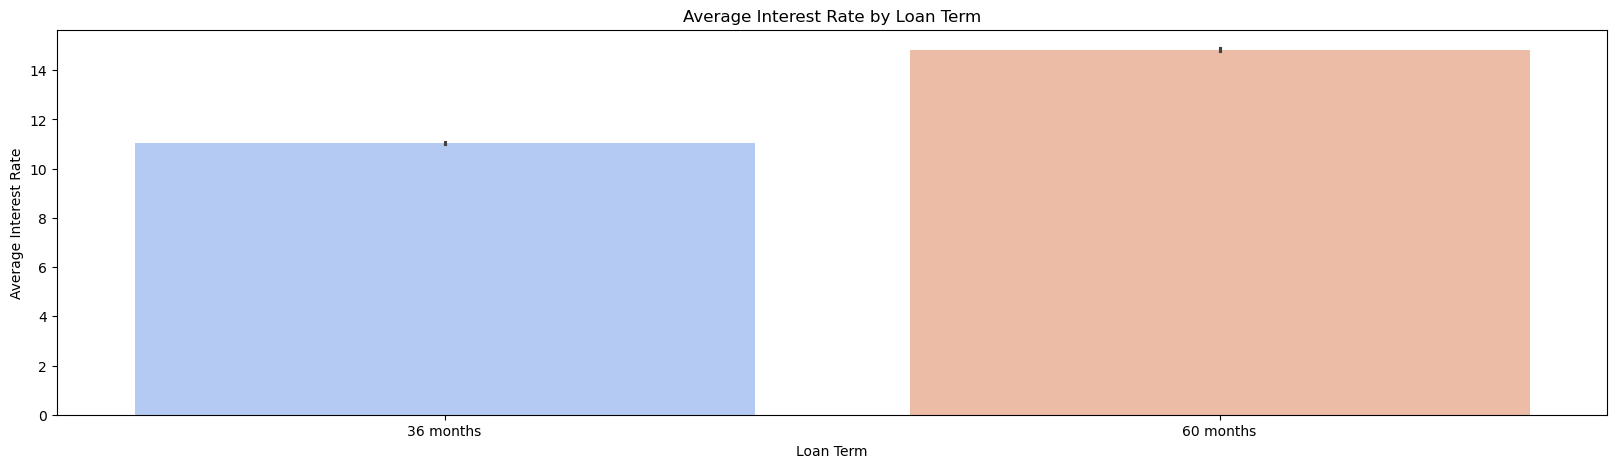

In [252]:
plt.figure(figsize=(20,5))
sns.barplot(x='term', y='int_rate', data=df, palette='coolwarm',legend= False,hue='term')
plt.title('Average Interest Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Average Interest Rate')
plt.show()

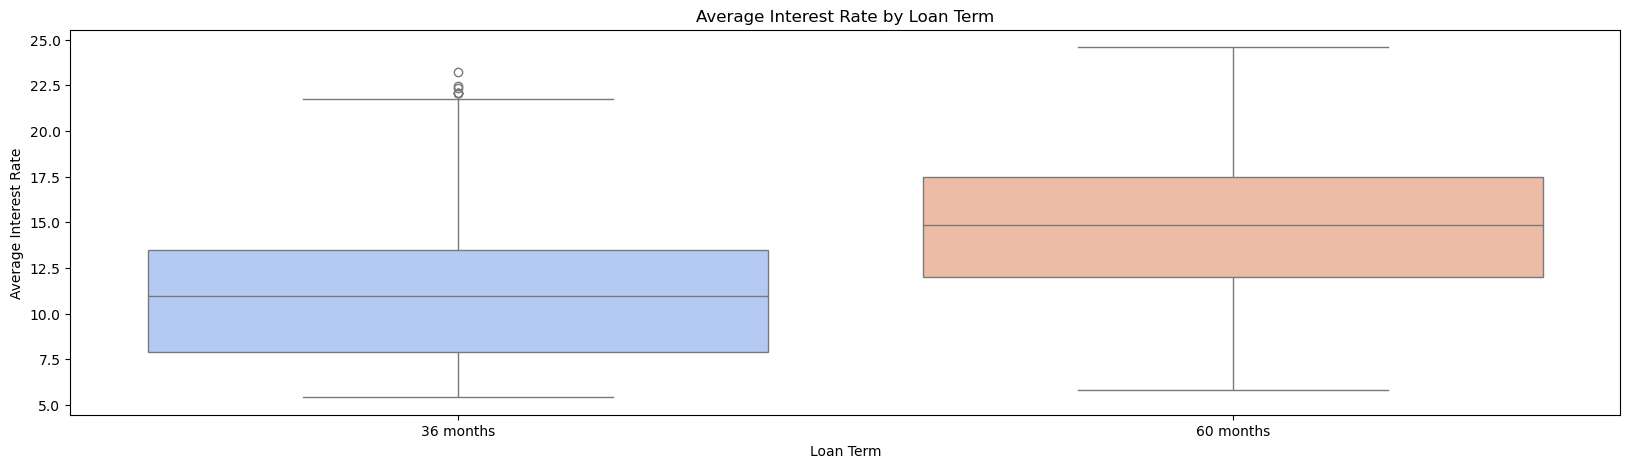

In [253]:
plt.figure(figsize=(20,5))
sns.boxplot(x='term', y='int_rate', data=df, palette='coolwarm',hue='term',legend=False)
plt.title('Average Interest Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Average Interest Rate')
plt.show()

**Analysis**

Loans with longer terms, like 60 months, have higher interest rates compared to shorter-term loans, like 36 months.

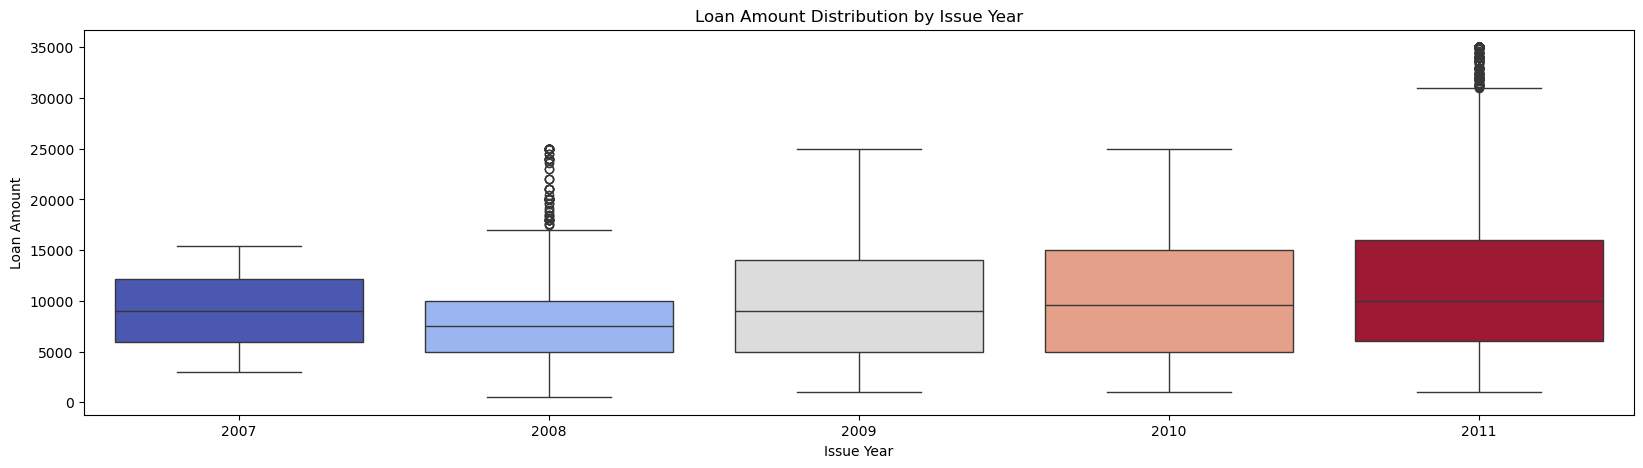

In [254]:
plt.figure(figsize=(20,5))
sns.boxplot(x='issue_year', y='loan_amnt', data=df, palette='coolwarm',hue='issue_year',legend=False)
plt.title('Loan Amount Distribution by Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Loan Amount')
plt.show()

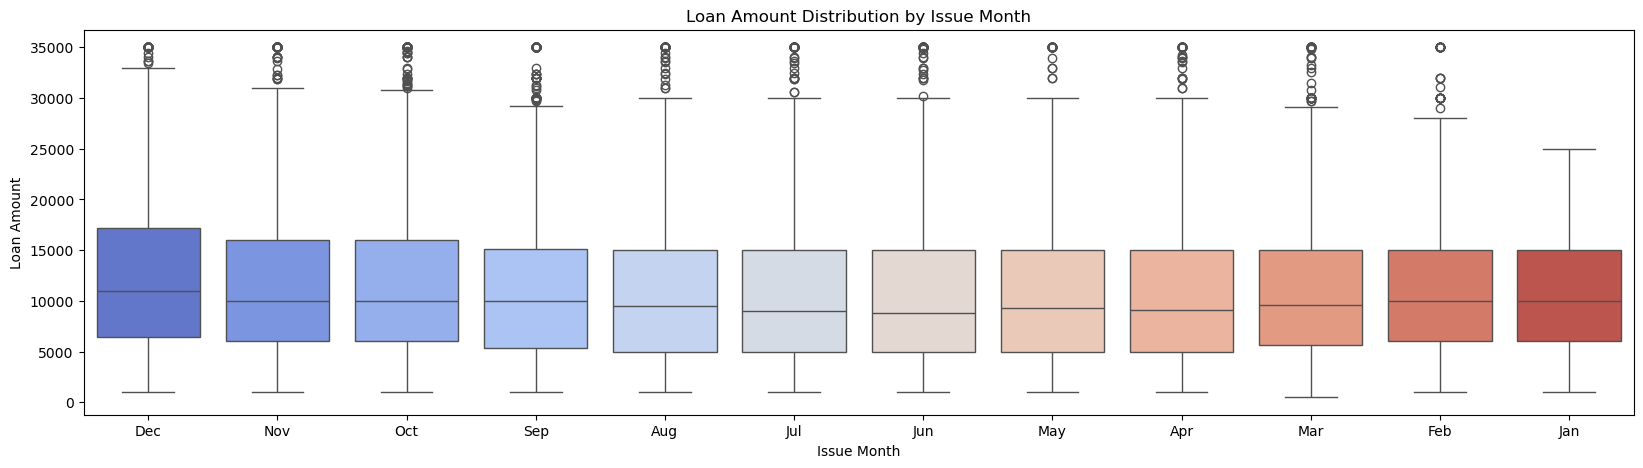

In [255]:
plt.figure(figsize=(20,5))
sns.boxplot(x='issue_month', y='loan_amnt', data=df, palette='coolwarm',hue='issue_month',legend=False)
plt.title('Loan Amount Distribution by Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Loan Amount')
plt.show()

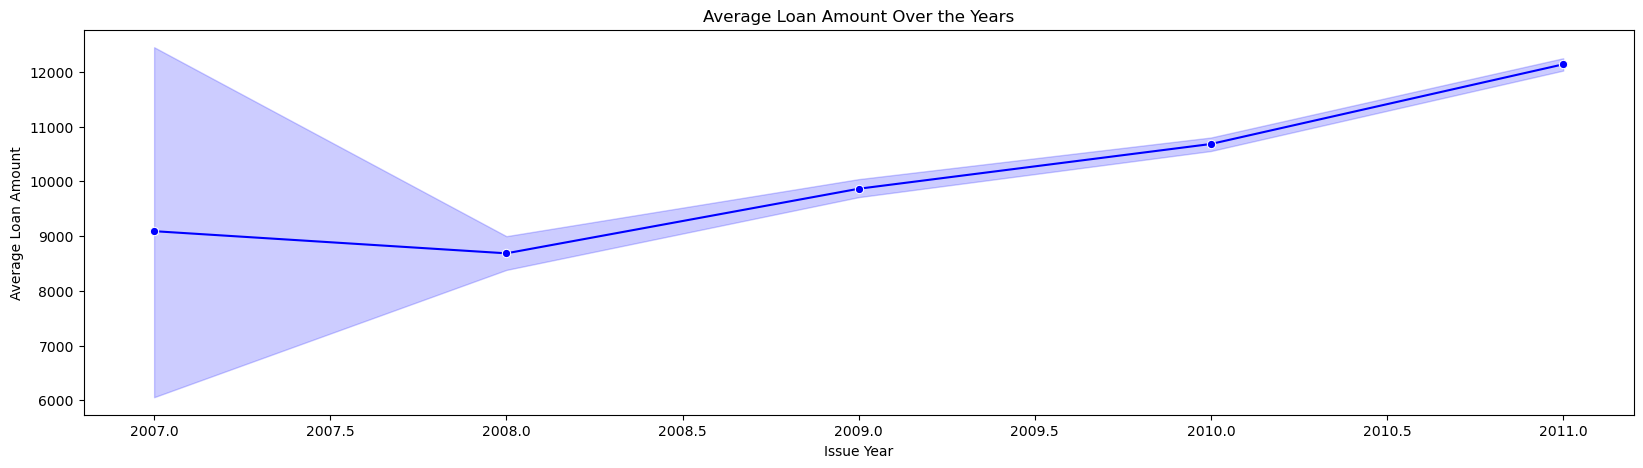

In [256]:
plt.figure(figsize=(20,5))
sns.lineplot(x='issue_year', y='loan_amnt', data=df, estimator='mean', marker='o', color='b')
plt.title('Average Loan Amount Over the Years')
plt.xlabel('Issue Year')
plt.ylabel('Average Loan Amount')
plt.show()

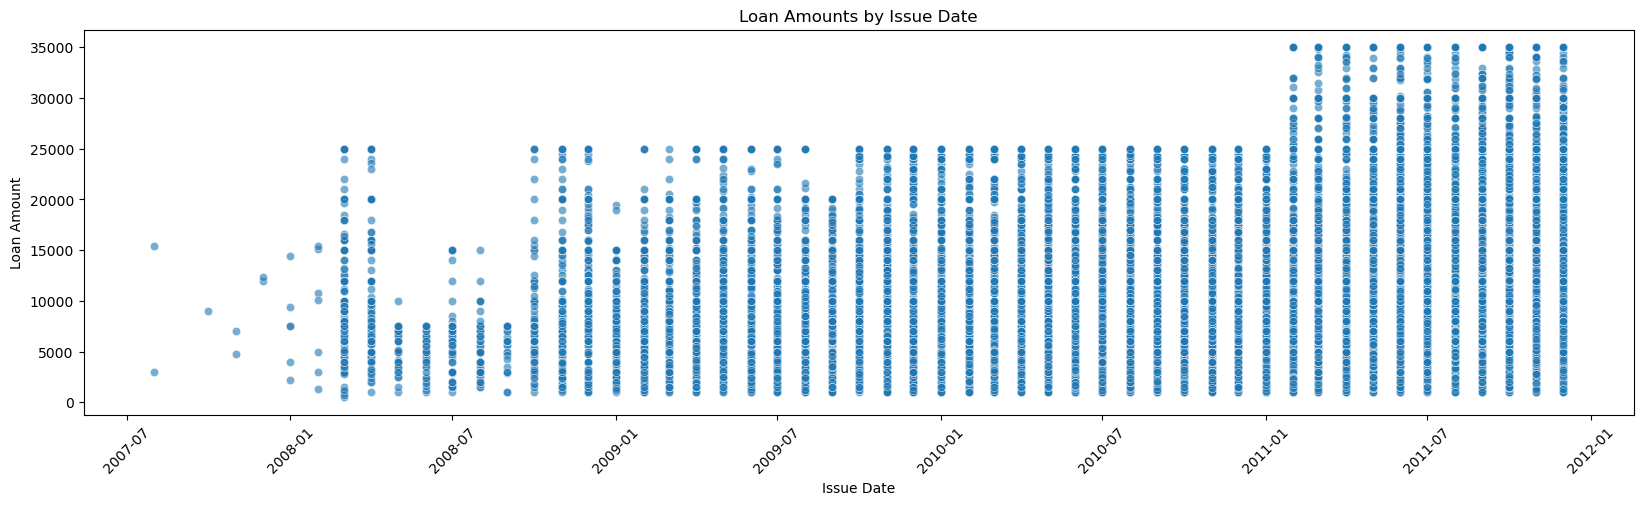

In [257]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='issue_d', y='loan_amnt', data=df, alpha=0.6)
plt.title('Loan Amounts by Issue Date')
plt.xlabel('Issue Date')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

**Analysis**

There has been a steady increase in loan amounts over the years

Loan Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan Status (Charged Off)')

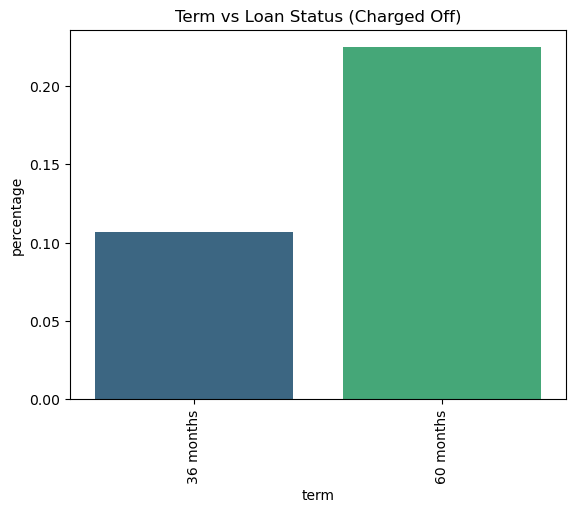

In [258]:
# Group by 'purpose' and 'loan_status' to count the occurrences
data = df.groupby(['term', 'loan_status'], as_index=False)['id'].count()

# Calculate percentage for each purpose across all loan statuses
data['percentage'] = data.groupby('term')['id'].transform(lambda x: x / x.sum())
# Filter for 'Charged Off' loan status
charged_off_data = data[data['loan_status'] == 'Charged Off']
# Plot the barplot
sns.barplot(x='term', y='percentage', data=charged_off_data, palette='viridis',legend=False,hue='term')
plt.xticks(rotation=90)
plt.title('Term vs Loan Status (Charged Off)')


Grade Vs Loan Status

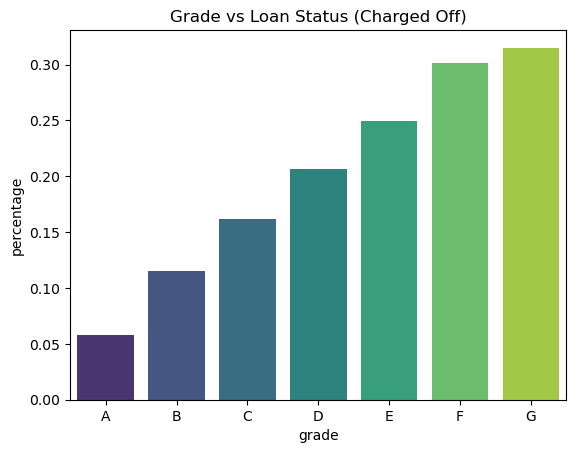

In [259]:

# Group by 'grade' and 'loan_status' to count the occurrences
data = df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()

# Calculate percentage for each purpose across all loan statuses
data['percentage'] = data.groupby('grade')['id'].transform(lambda x: x / x.sum())
# Filter for 'Charged Off' loan status
charged_off_data = data[data['loan_status'] == 'Charged Off']
sns.barplot(x='grade', y='percentage', data=charged_off_data, palette='viridis',legend=False,hue='grade')
plt.title('Grade vs Loan Status (Charged Off)')
plt.show()

Address State vs Loan Status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39562     Fully Paid
39573     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status, Length: 37898, dtype: object


Text(0.5, 1.0, 'Address State vs Loan Status (Charged Off)')

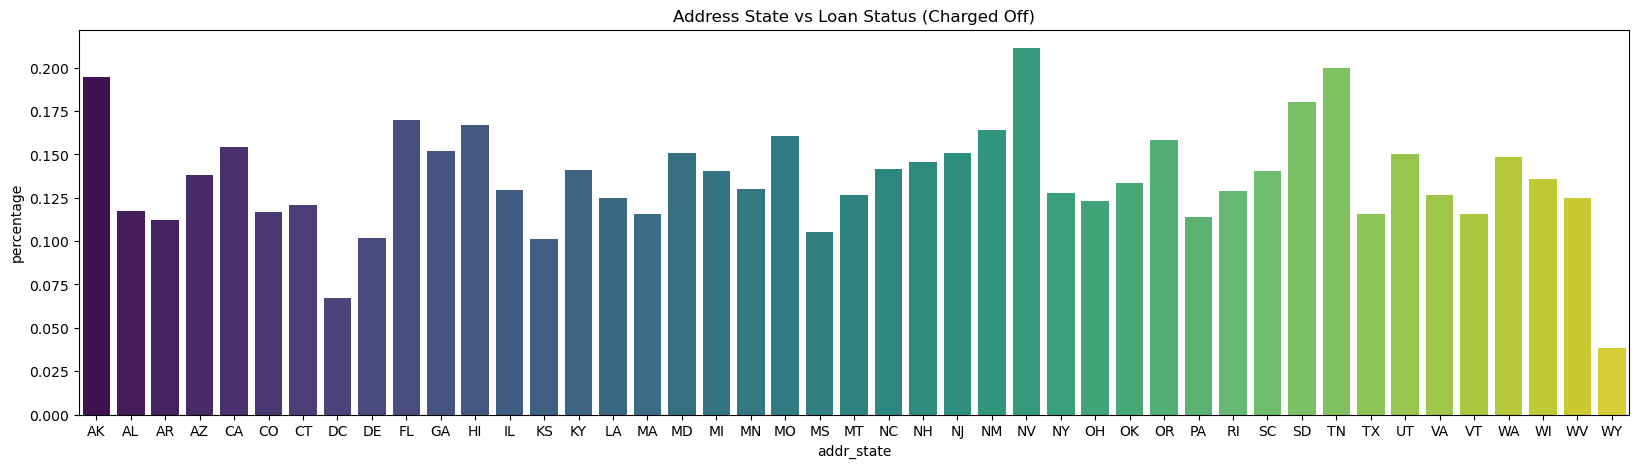

In [260]:
# Group by 'purpose' and 'loan_status' to count the occurrences
data = df.groupby(['addr_state', 'loan_status'], as_index=False)['id'].count()
print(df['loan_status'])
# Calculate percentage for each purpose across all loan statuses
data['percentage'] = data.groupby('addr_state')['id'].transform(lambda x: x / x.sum())
# Filter for 'Charged Off' loan status
charged_off_data = data[data['loan_status'] == 'Charged Off']
# Plot the barplot
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='percentage', data=charged_off_data, palette='viridis',legend=False,hue='addr_state')
# plt.xticks(rotation=90)
plt.title('Address State vs Loan Status (Charged Off)')

Text(0.5, 1.0, 'Address State vs Loan Status Fully Paid')

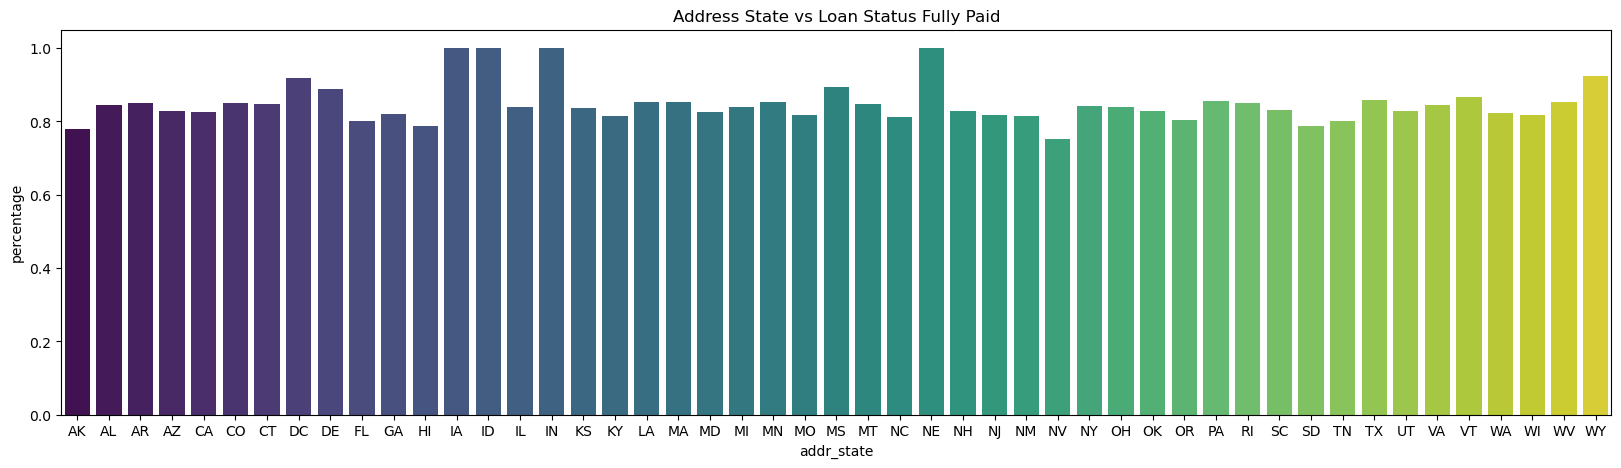

In [261]:
# Group by 'purpose' and 'loan_status' to count the occurrences
data = df.groupby(["addr_state", "loan_status"], as_index=False)["id"].count()

# Calculate percentage for each purpose across all loan statuses
data["percentage"] = data.groupby("addr_state")["id"].transform(lambda x: x / x.sum())
# Filter for 'Charged Off' loan status
charged_off_data = data[data["loan_status"] == "Fully Paid"]
# Plot the barplot
plt.figure(figsize=(20, 5))
sns.barplot(
    x="addr_state",
    y="percentage",
    data=charged_off_data,
    palette="viridis",
    legend=False,
    hue="addr_state",
)
# plt.xticks(rotation=90)
plt.title("Address State vs Loan Status Fully Paid")

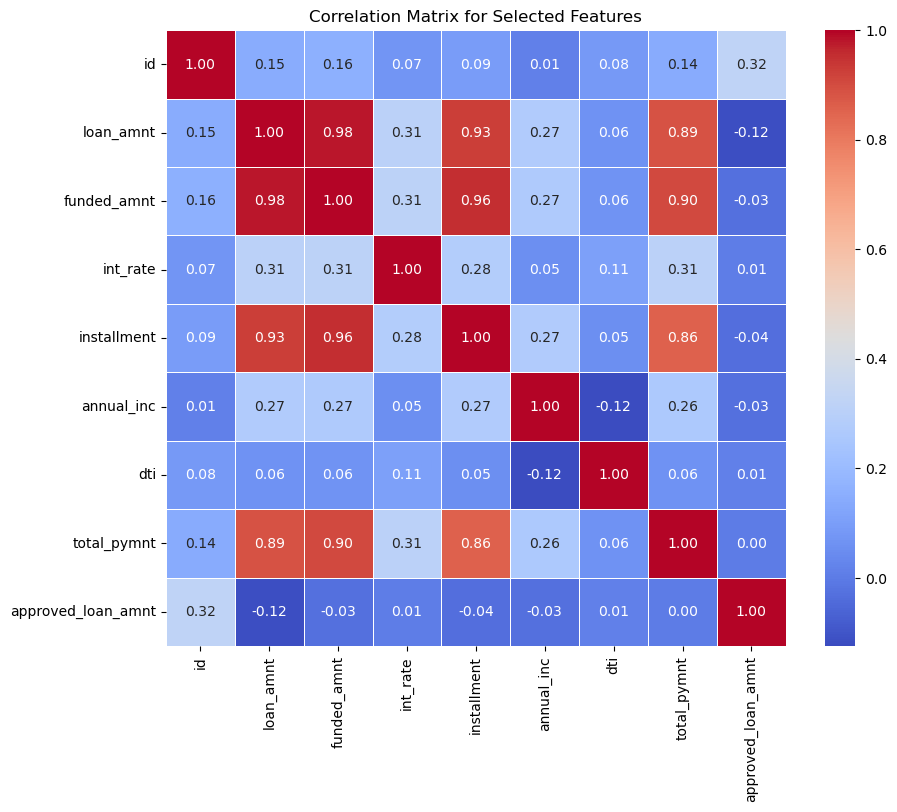

In [262]:
# Step 1: Select the relevant columns
columns_of_interest = ['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_pymnt', 'approved_loan_amnt']

# Subset the dataframe with the selected columns
df_selected = df[columns_of_interest]

# Step 2: Compute the Correlation Matrix
correlation_matrix = df_selected.corr()

# Step 3: Plot the Correlation Matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()